In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel("Final_excel.xlsx")

In [3]:
df.shape

(42064, 55)

In [4]:
X = df.drop(columns=['Approved_Flag'],axis=1)
y = df['Approved_Flag']

# 1. Random Forest

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [6]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [7]:
print("Accuracy Score:- ",accuracy_score(y_test,y_pred))
print(" Balanced Accuracy Score:- ",balanced_accuracy_score(y_test,y_pred))


precision,recall,f1_score,_ = precision_recall_fscore_support(y_test,y_pred)

Accuracy Score:-  0.7636990372043266
 Balanced Accuracy Score:-  0.6426569734060896


In [8]:
for i , v in enumerate(['p1','p2','p3','p4']):
    print(f"class {v}: ")
    print(f"precision: {precision[i]}")
    print(f"recall: {recall[i]}")
    print(f"f1_score: {f1_score[i]}")
    print("\n")



class p1: 
precision: 0.8370457209847597
recall: 0.7041420118343196
f1_score: 0.7648634172469203


class p2: 
precision: 0.7957519116397621
recall: 0.9282457879088206
f1_score: 0.8569075937785909


class p3: 
precision: 0.4423380726698262
recall: 0.21132075471698114
f1_score: 0.28600612870275793


class p4: 
precision: 0.7178502879078695
recall: 0.7269193391642371
f1_score: 0.7223563495895703




# XG_Boost

In [9]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [10]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax',num_class = 4)
X = df.drop(columns=['Approved_Flag'],axis=1)
y = df['Approved_Flag']


In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,random_state=42,test_size=0.2)

In [13]:
xgb_model.fit(X_train,y_train)
y_pred_xg = xgb_model.predict(X_test)

In [14]:
print("Accuracy Score:- ",accuracy_score(y_test,y_pred_xg))
print(" Balanced Accuracy Score:- ",balanced_accuracy_score(y_test,y_pred_xg))

Accuracy Score:-  0.7783192677998336
 Balanced Accuracy Score:-  0.6800046699487469


In [15]:
print(accuracy_score(y_test,y_pred_xg))

precision,recall,f1_score,_ = precision_recall_fscore_support(y_test,y_pred_xg)

0.7783192677998336


In [16]:
for i , v in enumerate(['p1','p2','p3','p4']):
    print(f"class {v}: ")
    print(f"precision: {precision[i]}")
    print(f"recall: {recall[i]}")
    print(f"f1_score: {f1_score[i]}")
    print("\n")


class p1: 
precision: 0.823906083244397
recall: 0.7613412228796844
f1_score: 0.7913890312660173


class p2: 
precision: 0.8255418233924413
recall: 0.913577799801784
f1_score: 0.8673315769665036


class p3: 
precision: 0.4756380510440835
recall: 0.30943396226415093
f1_score: 0.3749428440786465


class p4: 
precision: 0.7342386032977691
recall: 0.7356656948493683
f1_score: 0.7349514563106796




# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
X = df.drop(columns=['Approved_Flag'],axis=1)
y = df['Approved_Flag']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [19]:
dt_model = DecisionTreeClassifier(max_depth=20,min_samples_split=10)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

In [20]:
print("Accuracy Score:- ",accuracy_score(y_test,y_pred_dt))
print(" Balanced Accuracy Score:- ",balanced_accuracy_score(y_test,y_pred_dt))
precision,recall,f1_score,_ = precision_recall_fscore_support(y_test,y_pred_dt)

Accuracy Score:-  0.7103292523475574
 Balanced Accuracy Score:-  0.6271660640927961


In [21]:
for i , v in enumerate(['p1','p2','p3','p4']):
    print(f"class {v}: ")
    print(f"precision: {precision[i]}")
    print(f"recall: {recall[i]}")
    print(f"f1_score: {f1_score[i]}")
    print("\n")


class p1: 
precision: 0.722820763956905
recall: 0.727810650887574
f1_score: 0.7253071253071254


class p2: 
precision: 0.8096629651276057
recall: 0.8237859266600595
f1_score: 0.8166633916290038


class p3: 
precision: 0.3455123113582208
recall: 0.3283018867924528
f1_score: 0.336687306501548


class p4: 
precision: 0.647
recall: 0.6287657920310982
f1_score: 0.6377525874815179




Xgboost is performing better

now HP tuning, 
feature engineering - scaling, graphs

if we can get better result

<AxesSubplot: ylabel='Approved_Flag'>

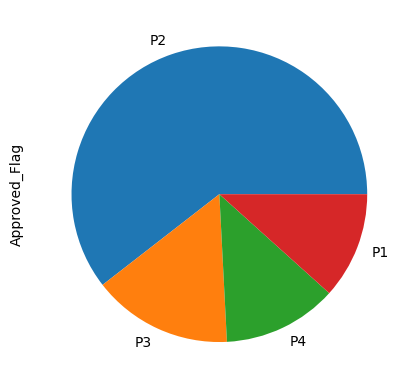

In [22]:
df['Approved_Flag'].value_counts().plot(kind='pie')

In [23]:
df['Approved_Flag'].value_counts(normalize=True)

P2    0.605078
P3    0.153100
P4    0.125143
P1    0.116679
Name: Approved_Flag, dtype: float64

# Hyper parameter Tuning of XG boost

In [24]:
param_grid = {

    'colsample_bytree' : [0.1,0.3,0.5,0.7,0.9],
    'learning_rate'    : [0.001,0.01,0.1,1],
    'max_depth'        : [3,5,8,10],
    'alpha'            : [1,10,100],
    'n_estimators'     : [10,50,100]
}



answers_grid = {
    'combination' : [],
    'train_Accuracy' : [],
    'test_Accuracy' : [],
    'colsample_bytree' : [],
    'learning_rate' : [],
    'max_depth' : [],
    'alpha' : [],
    'n_estimators' : []

}

In [25]:
# Loop Through each Combination of Hyperparameters
index = 0
for colsample_bytree in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:
                    index = index + 1

                    model = xgb.XGBClassifier(objective='multi:softmax',
                                              num_class = 4,
                                              colsample_bytree = colsample_bytree,
                                              learning_rate = learning_rate,
                                              max_depth = max_depth,
                                              alpha =alpha,
                                              n_estimators = n_estimators)
                    

                    X = df.drop(columns=['Approved_Flag'],axis=1)
                    y = df['Approved_Flag']
                    
                    le = LabelEncoder()
                    y_encoded = le.fit_transform(y) 

                    X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,random_state=42,test_size=0.2)

                    model.fit(X_train,y_train)

                    # Prediction on Training and testing data

                    y_pred_train = model.predict(X_train)
                    y_pred_test = model.predict(X_test)

                    # Calculate accuracy
                    train_accuracy = accuracy_score(y_train, y_pred_train)
                    test_accuracy = accuracy_score(y_test, y_pred_test)
                    # Include into the lists
                    answers_grid['combination'].append(index)
                    answers_grid['train_Accuracy'].append(train_accuracy)
                    answers_grid['test_Accuracy'].append(test_accuracy)
                    answers_grid['colsample_bytree'].append(colsample_bytree)
                    answers_grid['learning_rate'].append(learning_rate)
                    answers_grid['max_depth'].append(max_depth)
                    answers_grid['alpha'].append(alpha)
                    answers_grid['n_estimators'].append(n_estimators)

                    #print the result for this combination

#               # Print results for this combination
                    print(f"Combination {index}")
                    print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
                    print(f"Train Accuracy: {train_accuracy:.2f}")
                    print(f"Test Accuracy : {test_accuracy:.2f}")
                    print("-" * 30)





Combination 1
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 10
Train Accuracy: 0.61
Test Accuracy : 0.61
------------------------------
Combination 2
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 3
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 100
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 4
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 10
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 5
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 6
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 100
Train Accuracy: 0.61
Test Accu

In [64]:
# accuracy_table = pd.DataFrame(answers_grid)

# accuracy_table.to_excel("Accuracy_table.xlsx",index = False)

# Final Hyperparameter are Used Below

In [ ]:
df_unseen = pd.read_csv("D:/Data Science/Machine-Learning/ML Project/Credit Risk Modelling/Learnings/Unseen_Dataset.xlsx")


In [ ]:

model = xgb.XGBClassifier(objective='multi:softmax',
                        num_class = 4,
                        colsample_bytree = 0.9,
                        learning_rate = 1,
                        max_depth = 3,
                        alpha =10,
                        n_estimators = 100)

model.fit(X_train,y_train)